In [1]:
pip install mne

  Using cached mne-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached mne-1.7.1-py3-none-any.whl (7.4 MB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mne

# Function to load EEG data using MNE
def load_eeg_data(edf_file):
    raw = mne.io.read_raw_edf(edf_file, preload=True)
    return raw

# Load data for all subjects
subjects_data = {}

for i in range(36):
    subject_id = f'Subject{i:02d}'
    rest_file = f'eeg-during-mental-arithmetic-tasks-1.0.0/{subject_id}_1.edf'
    task_file = f'eeg-during-mental-arithmetic-tasks-1.0.0/{subject_id}_2.edf'
    
    raw_rest = load_eeg_data(rest_file)
    raw_task = load_eeg_data(task_file)
    
    subjects_data[subject_id] = {'rest': raw_rest, 'task': raw_task}

# Check the loaded data for the first subject
print(subjects_data['Subject00']['rest'].info)
print(subjects_data['Subject00']['task'].info)



Extracting EDF parameters from /Users/yashsaravane/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/yashsaravane/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /Users/yashsaravane/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/yashsaravane/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective wind

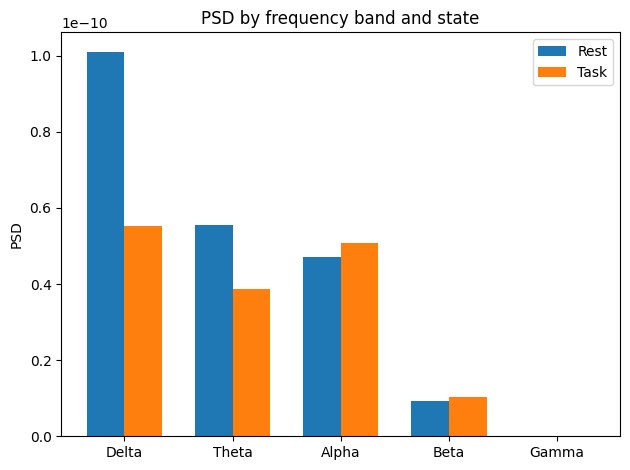

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Define frequency bands
freq_bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

# Function to calculate PSD
def calculate_psd(raw, band):
    data = raw.get_data()  # Get the data from the raw object
    sfreq = raw.info['sfreq']  # Sampling frequency
    psds, freqs = mne.time_frequency.psd_array_welch(data, sfreq=sfreq, fmin=band[0], fmax=band[1], n_fft=int(sfreq*2))
    return psds.mean(axis=0).mean()

# Calculate and compare PSD for each subject and state
psd_results = {}

for subject_id, data in subjects_data.items():
    psd_rest = {band: calculate_psd(data['rest'], freq_bands[band]) for band in freq_bands}
    psd_task = {band: calculate_psd(data['task'], freq_bands[band]) for band in freq_bands}
    
    psd_results[subject_id] = {'rest': psd_rest, 'task': psd_task}

# Plot PSD comparison for the first subject
subject_id = 'Subject00'
bands = list(freq_bands.keys())
psd_rest_values = list(psd_results[subject_id]['rest'].values())
psd_task_values = list(psd_results[subject_id]['task'].values())

x = np.arange(len(bands))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, psd_rest_values, width, label='Rest')
rects2 = ax.bar(x + width/2, psd_task_values, width, label='Task')

ax.set_ylabel('PSD')
ax.set_title('PSD by frequency band and state')
ax.set_xticks(x)
ax.set_xticklabels(bands)
ax.legend()

fig.tight_layout()
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler
X = []
y = []

for subject_id, data in subjects_data.items():
    features_rest = np.array([calculate_psd(data['rest'], freq_bands[band]) for band in freq_bands])
    features_task = np.array([calculate_psd(data['task'], freq_bands[band]) for band in freq_bands])
    
    X.append(features_rest)
    X.append(features_task)
    
    y.append(0)  # Rest
    y.append(1)  # Task

X = np.array(X)
y = np.array(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective wind

In [5]:
pip install --upgrade keras

  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# EEGNet model definition
def create_eegnet(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(16, (1, 8), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.DepthwiseConv2D((2, 1), depth_multiplier=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.AveragePooling2D((1, 4)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# TSCeption model definition (simplified and adjusted kernel sizes)
def create_tsception(input_shape):
    input_layer = layers.Input(shape=input_shape)
    conv1 = layers.Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    conv2 = layers.Conv1D(64, 3, activation='relu', padding='same')(conv1)
    conv3 = layers.Conv1D(128, 3, activation='relu', padding='same')(conv2)
    flat = layers.Flatten()(conv3)
    dense = layers.Dense(128, activation='relu')(flat)
    output = layers.Dense(1, activation='sigmoid')(dense)
    model = models.Model(inputs=input_layer, outputs=output)
    return model

# Prepare data for training
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1], 1))  # Reshape for EEGNet
X_reshaped_tsception = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for TSCeption

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
X_train_tsception, X_test_tsception, y_train_tsception, y_test_tsception = train_test_split(X_reshaped_tsception, y, test_size=0.2, random_state=42)

# EEGNet model
eegnet_model = create_eegnet((1, X.shape[1], 1))
eegnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
eegnet_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# TSCeption model
tsception_model = create_tsception((X.shape[1], 1))
tsception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tsception_model.fit(X_train_tsception, y_train_tsception, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate EEGNet
eegnet_accuracy, eegnet_precision, eegnet_recall, eegnet_f1 = evaluate_model(eegnet_model, X_test, y_test)
print(f"EEGNet - Accuracy: {eegnet_accuracy}, Precision: {eegnet_precision}, Recall: {eegnet_recall}, F1-Score: {eegnet_f1}")

# Evaluate TSCeption
tsception_accuracy, tsception_precision, tsception_recall, tsception_f1 = evaluate_model(tsception_model, X_test_tsception, y_test_tsception)
print(f"TSCeption - Accuracy: {tsception_accuracy}, Precision: {tsception_precision}, Recall: {tsception_recall}, F1-Score: {tsception_f1}")


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4220 - loss: 0.7024 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5134 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5212 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4476 - loss: 0.6761 - val_accuracy: 0.5833 - val_loss: 0.6936
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5245 - loss: 0.6835 - val_accuracy: 0.5833 - val_loss: 0.6930
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5043 - loss: 0.6723 - val_accuracy: 0.5833 - val_loss: 0.6923
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6359 - loss: 0.6609 - val_accuracy: 0.5833 - val_loss: 0.6918
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6170 - loss: 0.6520 - val_accuracy: 0.5833 - val_loss: 0.6917


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define a custom Attention layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.attention_weights = self.add_weight(shape=(input_shape[-1], 1),
                                                 initializer='random_normal',
                                                 trainable=True)

    def call(self, inputs):
        attention_scores = tf.matmul(inputs, self.attention_weights)
        attention_scores = tf.squeeze(attention_scores, axis=-1)
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        weighted_input = inputs * tf.expand_dims(attention_weights, axis=-1)
        return weighted_input

# Define ATCNet model with Attention
def create_atcnet_with_attention(input_shape):
    input_layer = layers.Input(shape=input_shape)
    conv1 = layers.Conv1D(64, 3, activation='relu', padding='same')(input_layer)
    attention = AttentionLayer()(conv1)  # Add attention mechanism
    conv2 = layers.Conv1D(128, 3, activation='relu', padding='same')(attention)
    global_avg_pool = layers.GlobalAveragePooling1D()(conv2)
    output_layer = layers.Dense(1, activation='sigmoid')(global_avg_pool)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Assuming X_train_tsception, X_test_tsception, y_train_tsception, y_test_tsception are defined
X_train_atcnet, X_test_atcnet, y_train_atcnet, y_test_atcnet = train_test_split(X_reshaped_tsception, y, test_size=0.2, random_state=42)

# Create and compile ATCNet model with Attention
atcnet_attention_model = create_atcnet_with_attention((X_train_atcnet.shape[1], 1))
atcnet_attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ATCNet model with Attention
atcnet_attention_model.fit(X_train_atcnet, y_train_atcnet, epochs=50, batch_size=16, validation_split=0.2)
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate ATCNet model with Attention
atcnet_attention_accuracy, atcnet_attention_precision, atcnet_attention_recall, atcnet_attention_f1 = evaluate_model(atcnet_attention_model, X_test_atcnet, y_test_atcnet)
print(f"ATCNet Model with Attention - Accuracy: {atcnet_attention_accuracy}, Precision: {atcnet_attention_precision}, Recall: {atcnet_attention_recall}, F1-Score: {atcnet_attention_f1}")




Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4253 - loss: 0.6939 - val_accuracy: 0.4167 - val_loss: 0.6950
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5212 - loss: 0.6905 - val_accuracy: 0.5833 - val_loss: 0.6931
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6014 - loss: 0.6870 - val_accuracy: 0.5833 - val_loss: 0.6917
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6438 - loss: 0.6837 - val_accuracy: 0.5833 - val_loss: 0.6906
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5780 - loss: 0.6824 - val_accuracy: 0.5833 - val_loss: 0.6900
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5936 - loss: 0.6812 - val_accuracy: 0.5833 - val_loss: 0.6903
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5780 - loss: 0.6814 - val_accuracy: 0.5833 - val_loss: 0.6895
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5936 - loss: 0.6753 - val_accuracy: 0.5833 - val_loss: 0.6896


In [17]:
# Define the Vision Transformer (ViT) model
def create_vit(input_shape, patch_size, num_patches, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Creating patches
    patches = layers.Conv2D(1, kernel_size=(patch_size, patch_size), strides=(patch_size, patch_size))(inputs)
    patches = layers.Reshape((num_patches, -1))(patches)
    
    # Positional Encoding
    positions = tf.range(start=0, limit=num_patches, delta=1)
    pos_encoding = layers.Embedding(input_dim=num_patches, output_dim=patches.shape[-1])(positions)
    patches = patches + pos_encoding

    # Transformer Encoder
    for _ in range(6):
        x1 = layers.LayerNormalization(epsilon=1e-6)(patches)
        attention_output = layers.MultiHeadAttention(num_heads=8, key_dim=patches.shape[-1])(x1, x1)
        x2 = layers.Add()([patches, attention_output])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        mlp_output = layers.Dense(units=x2.shape[-1], activation=tf.nn.gelu)(x3)
        patches = layers.Add()([x2, mlp_output])

    # Classification head
    x = layers.GlobalAveragePooling1D()(patches)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Ensure X has the correct shape
# Assuming X has shape (n_samples, n_features)
if len(X.shape) == 2:
    n_samples, n_features = X.shape
    # Adding a channel dimension for ViT compatibility
    X_reshaped_vit = X.reshape((n_samples, n_features, 1))
else:
    raise ValueError("Input data X must have shape (n_samples, n_features)")

# Define patch size and number of patches
patch_size = 1  # Choose a patch size that fits the number of features
num_patches = n_features // patch_size

# Reshape X_reshaped_vit to have an additional dimension for channels
X_reshaped_vit = X_reshaped_vit.reshape((n_samples, n_features, patch_size, 1))

# Split data for ViT
X_train_vit, X_test_vit, y_train_vit, y_test_vit = train_test_split(X_reshaped_vit, y, test_size=0.2, random_state=42)

# Create and compile ViT model
vit_model = create_vit(input_shape=(n_features, patch_size, 1), patch_size=patch_size, num_patches=num_patches, num_classes=1)
vit_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ViT model
vit_model.fit(X_train_vit, y_train_vit, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate ViT model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

vit_accuracy, vit_precision, vit_recall, vit_f1 = evaluate_model(vit_model, X_test_vit, y_test_vit)
print(f"ViT - Accuracy: {vit_accuracy}, Precision: {vit_precision}, Recall: {vit_recall}, F1-Score: {vit_f1}")

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - accuracy: 0.4767 - loss: 0.7380 - val_accuracy: 0.8333 - val_loss: 0.6414
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4533 - loss: 0.7313 - val_accuracy: 0.8333 - val_loss: 0.6399
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4142 - loss: 0.7608 - val_accuracy: 0.7500 - val_loss: 0.6398
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4175 - loss: 0.7658 - val_accuracy: 0.7500 - val_loss: 0.6387
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4253 - loss: 0.7547 - val_accuracy: 0.7500 - val_loss: 0.6380
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4286 - loss: 0.7597 - val_accuracy: 0.7500 - val_loss: 0.6376
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4990 - loss: 0.7360 - val_accuracy: 0.7500 - val_loss: 0.6375
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4521 - loss: 0.7373 - val_accuracy: 0.6667 - val_loss: 0.637